## 다항회귀

__세상의 모든 관계를 직선으로만 표현할 수 없다__ <br>
회귀가 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것을 다항(Polynomial) 회귀라고 한다.

$y=w_0 + w_1*x_1 + w_2*x_2 + w_3*x_1*w_2 + w_4*x_1^2 + w_5*x_2^2$

__다항회귀는 비선형회귀가 아닌 선형회귀다.__ <br>
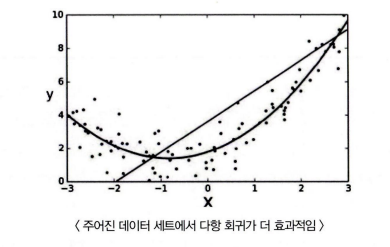

__사이킷런은 다항회귀를 위한 클래스를 명시적으로 제공하지 않는다.__ <br>

사이킷런의 PolynomialFeatures 클래스를 통해 피처를 Polynomial(다항식) 피처로 변환

In [1]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성. [[0,1], [2,3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n',X)

# degree = 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


> 1차 단항식 $x_1, x_2 = [0,1]$ 을 2차 다항식으로 변경 [$1,x_1, x_2, x_1^2, x_1x_2, x_2^2$] => 결과 [1. 0. 1. 0. 0. 1.] <br>
> 1차 단항식 $x_1, x_2 = [2,3]$ 을 2차 다항식으로 변경 [$1,x_1, x_2, x_1^2, x_1x_2, x_2^2$] => 결과 [1. 2. 3. 4. 6. 9.]

In [2]:
# 3차 다항 회귀 함수
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값:\n', y)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
삼차 다항식 결정값:
 [  5 125]


> 3차 다항식= $[1, x_1,  x_2,  x_1^2,  x_1x_2,  x_2^2,  x_1^3,  x_1^2x_2,  x_1x_2^2,  x_1^3]$

In [3]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature:\n', poly_ftr)

# Linear regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(poly_ftr, y)

print('Polynomial 회귀계수\n', np.round(lr.coef_, 2))
print('Polynomial 회귀 shape:', lr.coef_.shape)

3차 다항식 계수 feature:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 shape: (10,)


> 1차 단항식 계수 피처는 2개 였지만 3차 다항식 Polynomial변환 이후에는 다항식 계수 피처가 10개로 늘어난다. 

### [Plus] 사이킷런의 Pipeline을 이용해 한번에 다항회귀로 구현

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y 

# Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])

X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)

print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


## 다항회귀와 과적합의 문제
다항회귀의 차수(degree)를 높일수록 학습데이터에만 너무 맞춘 학습이 이뤄져서 정작 테스트 데이터 환경에서는 오히려 예측 정확도가 떨어진다. 즉, **차수가 높아질수록 과적합의 문제가 크게 발생한다**


Degree 1 회귀계수는 [-1.61] 입니다.
Degree 1 MSE는 0.4077289625098685 입니다.

Degree 4 회귀계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE는 0.04320874987232056 입니다.

Degree 15 회귀계수는 [-2.98291000e+03  1.03898880e+05 -1.87415324e+06  2.03715471e+07
 -1.44872830e+08  7.09313489e+08 -2.47065245e+09  6.24559902e+09
 -1.15676336e+10  1.56894743e+10 -1.54005873e+10  1.06457184e+10
 -4.91377255e+09  1.35919593e+09 -1.70380747e+08] 입니다.
Degree 15 MSE는 181238260.14863485 입니다.


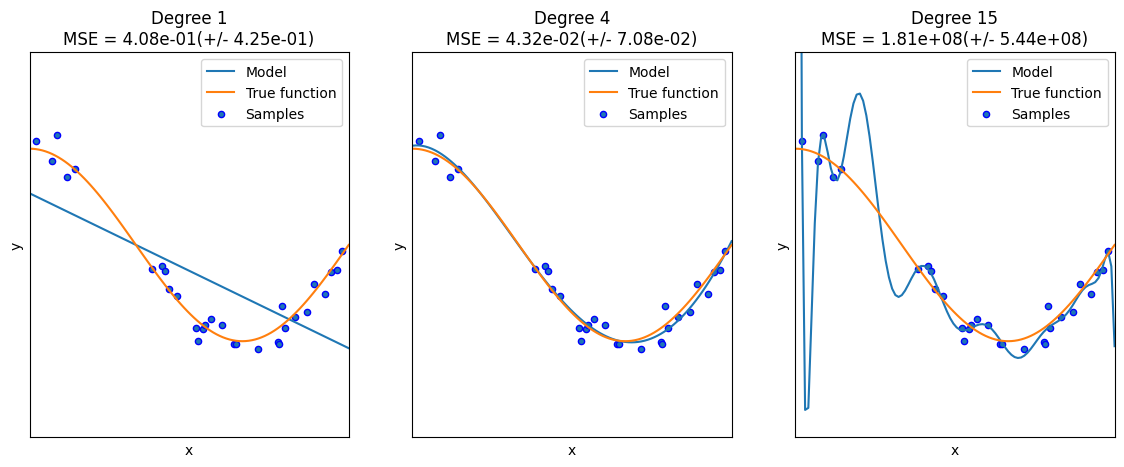

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환.
def true_func(X):
    return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터.
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y값은 코사인 기반의 true_func()에서 약간의 노이즈 변동 값을 더한 값.
y = true_func(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14,5))
degrees = [1,4,15]

# 다항회귀의 차수(degree)를 1,4,15로 각각 변화시키면서 비교합니다.
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())

    # 개별 degree별로 Polynomial변환
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regresson= LinearRegression()
    pipeline = Pipeline([('polynomial_features', polynomial_features), 
                        ('linear_regression', linear_regresson)])
    pipeline.fit(X.reshape(-1,1), y)

    # 교차 검증으로 다항 회귀를 평가
    scores= cross_val_score(pipeline, X.reshape(-1,1), y, scoring='neg_mean_squared_error', cv=10)

    # pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE는 {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))

    # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행.
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려 비교.
    X_test = np.linspace(0,1,100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label='Model')
    # 실제 값 곡선
    plt.plot(X_test, true_func(X_test), '-', label='True function')
    plt.scatter(X, y, edgecolors='b', s=20, label='Samples')

    plt.xlabel('x'); plt.ylabel('y'); plt.xlim((0,1)); plt.ylim((-2,2)); plt.legend(loc='best')
    plt.title('Degree {}\nMSE = {:.2e}(+/- {:.2e})'.format(degrees[i], -scores.mean(), scores.std()))

plt.show()

> degree = 15인 경우 degree1,4 인때보다 MSE값이 터무니 없이 높은 것을 확인할 수 있다.

> 따라서 회귀모델은 적절히 데이터에 적합하면서 회귀계수가 기하급수적으로 커지는 것을 제어할 수 있어야 한다. = **Regularization이 필요**한 이유

### 편향-분산 트레이드오프(Bias-Variance Trade off)

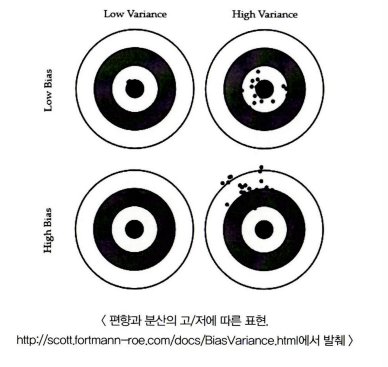

편향 : 알고리즘이나 모델이 실제 데이터를 얼마나 잘 대표하는지에 대한 척도 <br>
        - 고편향 : 데이터의 실제관계를 간과하고 너무 단순화하여 학습. <br>
        - 저편향 : 데이터의 복잡성을 잘 포착하여 학습 데이터에 대해 높은 정확도를 보여준다. <br>
                    하지만, 너무 복잡한 모델을 과적합을 일으킬 수 있다.<br>

분산 : 모델의 예측이 평균적으로 얼마나 변동하는지를 나타낸다. 높은 분산은 과적합을 의미. <br>

편향이 높으면 분산은 낮아지고(과소적합) 반대로 분산이 높으면 편향이 낮아진다.(과적합) <br>
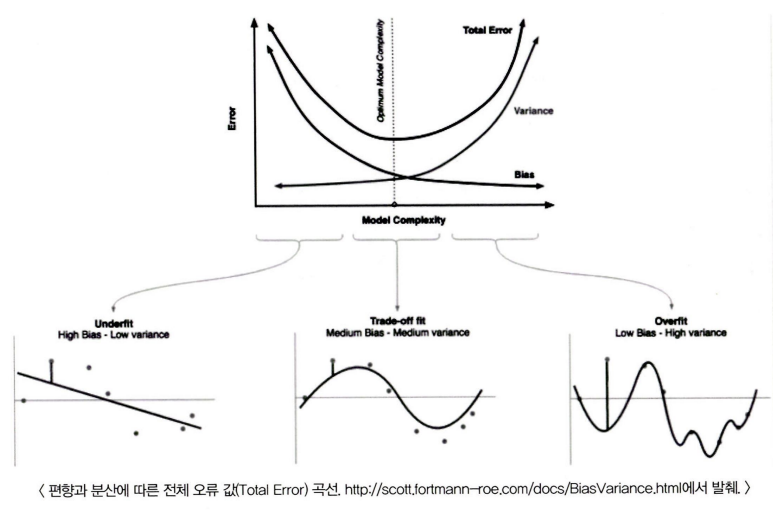

편향이 너무 높으면 전체 오류가 높다. 편향을 점점 낮추면 동시에 분산이 높아지고 전체 오류도 낮아지게 된다. 편향을 낮추고 분산을 높이면서 전체 오류가 가장 낮아지는 `골디락스`지점을 통과하면서 분산을 지속적으로 높이면 전체 오류값이 오히려 증가하면서 예측 성능이 다시 저하된다.